# **Digits image (MNIST DATASET) Classfication CNNs**

**Step 0 Load Mnist dataset**

In [10]:
import tensorflow
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Step 1 Check the number of images and their dimenstion**

In [11]:
print("Training Dataset")
print(X_train.shape)
print(y_train.shape)

Training Dataset
(60000, 28, 28)
(60000,)


In [12]:
print("Validation Dataset")
print(X_test.shape)
print(y_test.shape)

Validation Dataset
(10000, 28, 28)
(10000,)


**Step-2 Vizualize a random image an its label in the train set**

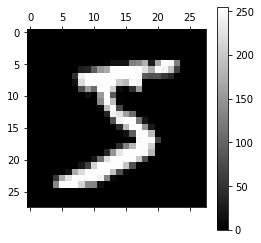

In [13]:
import matplotlib.pyplot as plt
plt.matshow(X_train[0], cmap='gray')
plt.colorbar()
plt.show()

In [14]:
# Verify that the corresponding "true" label is corret
print(y_train[0])

5


**Step-3 Reshape and normalize the input**


*   A 2D CNN model will accpect a 4D input data [number of data,height, width, depth of image]
*   So, I reshape each image of dimension[28,28] to [28,28,1]
*   Also, the image intensities can be anywhere from 0 to 255 these number to   be between in 0 and 1


In [15]:
#add an axis to serve as a channel
Xtrain=X_train.reshape((60000,28,28,1))
Xtest=X_test.reshape((10000,28,28,1))

#Normalize the inputs
Xtrain=Xtrain/255
Xtest=Xtest/255

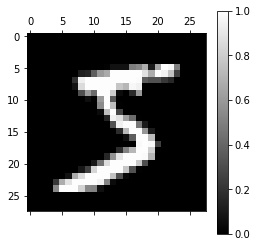

In [16]:
plt.matshow(Xtrain[0, :,:,0], cmap='gray')
plt.colorbar()
plt.show()

**Step -4 Reformate the labels(one-hot encode)**

*   one network will have 10 output nodes we need to convert our labels accordingly
* Verify that the shape of train_label



In [17]:
print("Before:")
print(y_train.shape)
print(y_train[0])

Before:
(60000,)
5


In [18]:
#one hot encode output the label 
ytrain=tensorflow.keras.utils.to_categorical(y_train)
ytest=tensorflow.keras.utils.to_categorical(y_test)


In [19]:
print("After:")
print(ytrain.shape)
print(ytrain[0])

After:
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Step -5 Create a nural network with architecture**


1.   The first layer has 16 filters and each of size 3X3
2.   The second layer has 16 filters and each of size 3X3
3.   The last layer is a set of 10 nerouns one for each of 10 digits

Dense layer to achive digit identification --CNN dekiver better accuracy.
Conv2D is the convolution layer - Conv2D(filters,(filter_height,filter_width),(activation),(input_shape)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape= Xtrain[0,:,:,:].shape))
model.add(Conv2D(4, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 4)         580       
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                23050     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 23,900
Trainable params: 23,900
Non-trainable params: 0
_________________________________________________________________


**Compile and train the model**

In [21]:
# compiling the sequential model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# training the model for 5 epochs
history=model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest),batch_size=64, epochs=100)

Epoch 1/100
938/938 [==============================] - 39s 8ms/step - loss: 0.4171 - accuracy: 0.8714 - val_loss: 0.1914 - val_accuracy: 0.9436
Epoch 2/100
938/938 [==============================] - 7s 7ms/step - loss: 0.1459 - accuracy: 0.9573 - val_loss: 0.1248 - val_accuracy: 0.9642
Epoch 3/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0992 - accuracy: 0.9707 - val_loss: 0.0977 - val_accuracy: 0.9706
Epoch 4/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0812 - accuracy: 0.9756 - val_loss: 0.0767 - val_accuracy: 0.9762
Epoch 5/100
938/938 [==============================] - 6s 7ms/step - loss: 0.0703 - accuracy: 0.9787 - val_loss: 0.0739 - val_accuracy: 0.9769
Epoch 6/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0660 - val_accuracy: 0.9799
Epoch 7/100
938/938 [==============================] - 7s 7ms/step - loss: 0.0565 - accuracy: 0.9829 - val_loss: 0.0680 - val_accuracy: 0.979

In [22]:
print(history.params)

{'verbose': 1, 'epochs': 100, 'steps': 938}


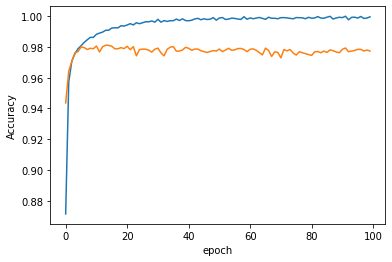

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()